# Dubrow and Divachi 2013
**TODO**: Describe experiment and the implementation of the simulations

**TODO**: Clean up this simluations and re-run simluations for inteligability


In [1]:
%matplotlib inline
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
import seaborn as sns
from models import *
from tqdm import tnrange
from simulations.exp_dubrow import run_subject, generate_experiment

sns.set_context('paper', font_scale=1.5)

Using TensorFlow backend.


TensorFlow Version: 1.9.0
Keras      Version: 2.2.0
TensorFlow Check Passed


In [2]:
# SEM parameters
df0 = 1.
scale0 = .2

mode = df0 * scale0 / (df0 + 2)
print("Prior variance (mode): {}".format(mode))

lmda = 10.0  # stickyness parameter
alfa = 1.  # concentration parameter

f_class = GRUEvent
f_opts=dict(var_scale0=scale0, var_df0=df0)

# create the corrupted memory trace
# noise parameters
b = 2
tau = 0.1
print("tau: {}".format(tau))

# set the parameters for the Gibbs sampler
gibbs_kwargs = dict(
    memory_alpha = alfa,
    memory_lambda = lmda,
    memory_epsilon = np.exp(-20),
    b = b,  # re-defined here for completeness
    tau = tau,  # ibid
    n_samples = 250,
    n_burnin = 100,
    progress_bar=False,
)
sem_kwargs = dict(lmda=lmda, alfa=alfa, f_class=f_class, f_opts=f_opts)

epsilon_e = 0.25

Prior variance (mode): 0.0666666666667
tau: 0.1


Prior variance (mode): 0.0666666666667
Median Feature variance: 0.0580971418405


Run SEM: 100%|██████████| 5/5 [00:06<00:00,  1.43s/it]


[0 1 2 3 4]


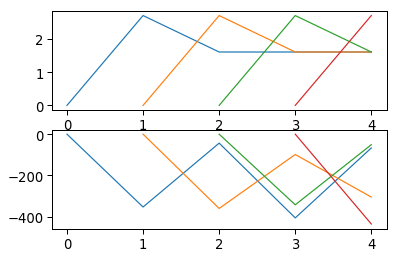

In [3]:
# spot-check the segementation ability

x_list_items, e_tokens = generate_experiment()

mode = df0 * scale0 / (df0 + 2)
print("Prior variance (mode): {}".format(mode))
print("Median Feature variance: {}".format(
    np.median(np.var(np.concatenate(x_list_items), axis=0))))

sem_kwargs = dict(
    lmda=lmda, alfa=alfa, f_class=f_class, f_opts=f_opts
)

sem = SEM(**sem_kwargs)
sem.run_w_boundaries(list_events=x_list_items)
print sem.results.e_hat

fig, axes = plt.subplots(2, 1)
axes[0].plot(sem.results.log_prior)
axes[1].plot(sem.results.log_like)
plt.show()

In [4]:
# # load saved simluations from memory
# from glob import glob
# n_batch = 25
# files = glob('simulations/saved_simulations/Dubrow_sim_*.pkl')
# results = pd.concat([pd.read_pickle(f) for f in files])
pd.__version__

u'0.24.2'

In [5]:
pd.DataFrame({'Ext': 1, 'asdf': 2},index=[0])

,Ext,asdf
0,1,2


In [6]:
# # uncomment to re-run simulations (takes about a day)

# from tqdm import tnrange, tqdm_notebook

# n_batch = 12
# n_runs = 16

# results = []
# for b in tqdm_notebook([2, 5], desc='Beta'):
#     _res = []
#     for ii in tnrange(n_batch, desc='Batch', leave=False):

#         gibbs_kwargs = dict(
#             memory_alpha = alfa,
#             memory_lambda = lmda,
#             memory_epsilon = np.exp(-20),
#             b = b,  # re-defined here for completeness
#             tau = tau,  # ibid
#             n_samples = 250,
#             n_burnin = 100,
#             progress_bar=False,
#         )


#         _res.append(run_subject(
#             sem_kwargs, gibbs_kwargs, epsilon_e, n_runs=n_runs, subj_n=ii, progress_bar=False
#         ))
#     _res = pd.concat(_res)
#     _res['b'] = b
#     results.append(_res)
    
# results = pd.concat(results)
results = pd.read_pickle('Dubrow_param_sensitivity.pkl')

In [7]:
# results.loc[np.isnan(results['Transitions Pre-Boundary'].values), 'Transitions Pre-Boundary'] = 0.0
# results.loc[np.isnan(results['Transitions Boundary'].values), 'Transitions Boundary'] = 0.0

# results['PreVsPost'] = results['Transitions Pre-Boundary'].values - results['Transitions Boundary'].values 



/Users/nicholasfranklin/anaconda3/envs/sem/lib/python2.7/site-packages/scipy/stats/stats.py:1713: FutureWarning: Using a non-tuple sequence for multidimensional indexing is deprecated; use `arr[tuple(seq)]` instead of `arr[seq]`. In the future this will be interpreted as an array index, `arr[np.array(seq)]`, which will result either in an error or a different result.
  return np.add.reduce(sorted[indexer] * weights, axis=axis) / sumval


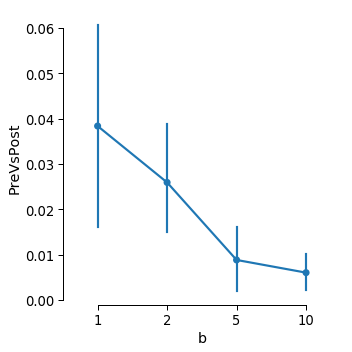

In [8]:
sns.catplot(data=results, x='b', y='PreVsPost', kind='point')
sns.despine(trim=True)
# plt.axhline(y=0, c='k')

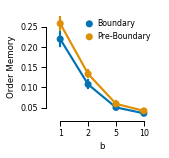

In [18]:
# pd.wide_to_long(results, [''])
cols = ['Block', 'Transitions Boundary', 'Transitions Pre-Boundary', 'Subject','b']
res_red = results[cols].copy()
res_red.columns = ['Block','Boundary','Pre-Boundary', 'Subject', 'b']
res_red = pd.melt(res_red, id_vars = ['Block', 'Subject', 'b'], 
                  value_vars = ['Boundary', 'Pre-Boundary'],
                  value_name = 'Order Memory', var_name='Transitions')

with sns.plotting_context('paper', font_scale=0.9):
    fig, ax = plt.subplots(figsize=(2.0, 2.))
    sns.pointplot(data=res_red, x='b', y='Order Memory',
                  hue='Transitions', palette='colorblind',
                ax=ax)
#     ax.get_legend().remove()
    ax.legend(frameon=False, handletextpad=0.0)
    sns.despine(trim=True)
    plt.savefig('Param_sensitivity_dubrow.png', dpi=300, bbox_inches='tight')

In [70]:
help(ax.legend)

Help on method legend in module matplotlib.axes._axes:

legend(self, *args, **kwargs) method of matplotlib.axes._subplots.AxesSubplot instance
    Places a legend on the axes.
    
    Call signatures::
    
        legend()
        legend(labels)
        legend(handles, labels)
    
    The call signatures correspond to three different ways how to use
    this method.
    
    **1. Automatic detection of elements to be shown in the legend**
    
    The elements to be added to the legend are automatically determined,
    when you do not pass in any extra arguments.
    
    In this case, the labels are taken from the artist. You can specify
    them either at artist creation or by calling the
    :meth:`~.Artist.set_label` method on the artist::
    
        line, = ax.plot([1, 2, 3], label='Inline label')
        ax.legend()
    
    or::
    
        line.set_label('Label via method')
        line, = ax.plot([1, 2, 3])
        ax.legend()
    
    Specific lines can be excluded from

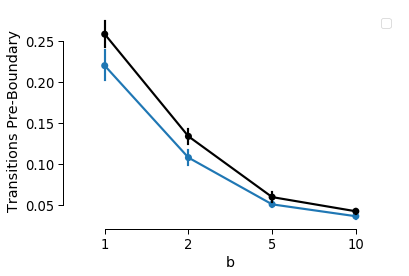

In [13]:
sns.pointplot(data=results, x='b', y='Transitions Boundary', label='Boundary')
sns.pointplot(data=results, x='b', y='Transitions Pre-Boundary', color='k', label='Pre-Boundary')
plt.legend()
sns.despine(trim=True)
# plt.axhline(y=0, c='k')

In [10]:
y = [results.groupby('Subject').mean()['Transitions Boundary'],
     results.groupby('Subject').mean()['Transitions Pre-Boundary']]
from scipy.stats import ttest_1samp
ttest_1samp(y[0] - y[1], 0)



Ttest_1sampResult(statistic=-5.0784321654253235, pvalue=0.00027135868830057525)

In [11]:
plt.figure(figsize=(3, 3))
x = ['Boundary', 'Pre-Boundary']
y = [results.groupby('Subject').mean()['Boundary'].mean(),
     results.groupby('Subject').mean()['Pre-Boundary'].mean()]
y_err = [results.groupby('Subject').mean()['Boundary'].std() / np.sqrt(n_batch),
     results.groupby('Subject').mean()['Pre-Boundary'].std() / np.sqrt(n_batch)]

plt.bar(x[0], y[0], lw=1, edgecolor='k', facecolor='w')
plt.bar(x[1], y[1], lw=1, edgecolor='k', facecolor='grey')
plt.errorbar(x, y, y_err, marker='None', lw=2, ls='None', c='k')
plt.ylabel('Accuracy')
sns.despine()

from scipy.stats import ttest_1samp
print ttest_1samp(results.groupby('Subject').mean()['Boundary'].values - 
                results.groupby('Subject').mean()['Pre-Boundary'].values, 0)

NameError: name 'n_batch' is not defined

<Figure size 216x216 with 0 Axes>

In [ ]:
plt.figure(figsize=(3, 3))
x = ['Boundary', 'Pre-Boundary']
y = [results.groupby('Subject').mean()['Transitions Boundary'].mean(),
     results.groupby('Subject').mean()['Transitions Pre-Boundary'].mean()]
y_err = [results.groupby('Subject').mean()['Transitions Boundary'].std() / np.sqrt(n_batch),
     results.groupby('Subject').mean()['Transitions Pre-Boundary'].std() / np.sqrt(n_batch)]

plt.bar(x[0], y[0], lw=1, edgecolor='k', facecolor='w')
plt.bar(x[1], y[1], lw=1, edgecolor='k', facecolor='grey')
plt.errorbar(x, y, y_err, marker='None', lw=2, ls='None', c='k')
plt.ylabel('Transition Accuracy')
sns.despine()

from scipy.stats import ttest_1samp
print ttest_1samp(results.groupby('Subject').mean()['Transitions Boundary'].values - 
                results.groupby('Subject').mean()['Transitions Pre-Boundary'].values, 0)

# plt.savefig('Dubrow_correct_transitions_GRU.png', dpi=300, bbox_inches='tight')

In [ ]:
results_copy = results.copy()
results_copy.loc[results_copy['Transitions Boundary'].isnull(), 'Transitions Boundary'] = 0
results_copy.loc[results_copy['Transitions Pre-Boundary'].isnull(), 'Transitions Pre-Boundary'] = 0


plt.figure(figsize=(3, 3))
x = ['Boundary', 'Pre-Boundary']
y = [results_copy.groupby('Subject').mean()['Transitions Boundary'].mean(),
     results_copy.groupby('Subject').mean()['Transitions Pre-Boundary'].mean()]
y_err = [results_copy.groupby('Subject').mean()['Transitions Boundary'].std() / np.sqrt(n_batch),
     results_copy.groupby('Subject').mean()['Transitions Pre-Boundary'].std() / np.sqrt(n_batch)]

plt.bar(x[0], y[0], lw=1, edgecolor='k', facecolor='w')
plt.bar(x[1], y[1], lw=1, edgecolor='k', facecolor='grey')
plt.errorbar(x, y, y_err, marker='None', lw=2, ls='None', c='k')
plt.ylabel('Transition Accuracy')
sns.despine()

from scipy.stats import ttest_1samp
print ttest_1samp(results_copy.groupby('Subject').mean()['Transitions Boundary'].values - 
                results_copy.groupby('Subject').mean()['Transitions Pre-Boundary'].values, 0)

# plt.savefig('Dubrow_correct_transitions_GRU.png', dpi=300, bbox_inches='tight')

In [ ]:
# the overall accuracy is low, this is something we may have to revisit

results_copy['Overall Acc'].mean()